In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [150]:
df = pd.read_csv('flights_clean.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,18:29,17:55,19:59,19:25,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
1,2008,1,3,4,19:37,18:30,20:37,19:40,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0
2,2008,1,3,4,16:44,15:10,18:45,17:25,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,8.0,0.0,0.0,0.0,72.0
3,2008,1,3,4,14:52,14:25,16:40,16:25,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,3.0,0.0,0.0,0.0,12.0
4,2008,1,3,4,13:23,12:55,15:26,15:10,WN,4,N674AA,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0.0,0.0,0.0,0.0,16.0


### Nivell 1

# Exercici 1

Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

## Exploratori Data Analysis (EDA)

In [151]:
y = target = df['ArrDelay']
print(y.shape)

(1247484,)


+ quines variables fem servir pels features (X)?

In [152]:
df_subset = pd.DataFrame()

In [153]:
df_subset['suma_delays'] = df[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].sum(axis=1)

In [154]:
df_subset['difference'] = df_subset['suma_delays'] - target

<AxesSubplot:xlabel='suma_delays', ylabel='difference'>

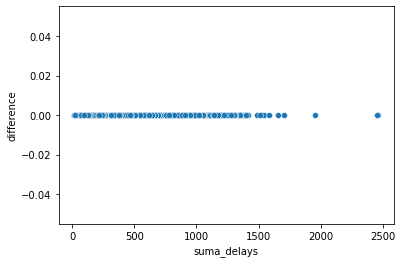

In [155]:
sns.scatterplot(x='suma_delays',y='difference',data=df_subset)

In [156]:
np.any(df_subset.difference == 0)

True

+ com la suma_delays es el mateix que ArrDelay, puc eliminar aquestes variables

In [157]:
df.drop(columns=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'],axis=1,inplace=True)

In [159]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
0,2008,1,3,4,18:29,17:55,19:59,19:25,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0
1,2008,1,3,4,19:37,18:30,20:37,19:40,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0
2,2008,1,3,4,16:44,15:10,18:45,17:25,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0
3,2008,1,3,4,14:52,14:25,16:40,16:25,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0
4,2008,1,3,4,13:23,12:55,15:26,15:10,WN,4,N674AA,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0


In [161]:
# mirem variables numeriques
X = df[['Month','DayofMonth','DayOfWeek','ActualElapsedTime','CRSElapsedTime','AirTime','DepDelay','Distance','TaxiIn','TaxiOut']]
print(X.shape)

(1247484, 10)


In [163]:
X.head()

,Month,DayofMonth,DayOfWeek,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
0,1,3,4,90.0,90.0,77.0,34.0,515,3.0,10.0
1,1,3,4,240.0,250.0,230.0,67.0,1591,3.0,7.0
2,1,3,4,121.0,135.0,107.0,94.0,828,6.0,8.0
3,1,3,4,228.0,240.0,213.0,27.0,1489,7.0,8.0
4,1,3,4,123.0,135.0,110.0,28.0,838,4.0,9.0


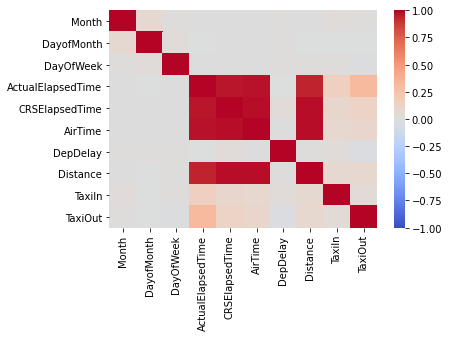

In [164]:
# existeix alguna correlació entre aquestes variables numeriques?
corr = X.corr()
sns.heatmap(corr,cmap='coolwarm',vmax=1, vmin=-1)
plt.show()

+ hem de seleccionar aquelles variables independents i que tinguin poca correlacio entre elles al model final. Si no fos aixi s'introdueix error al modelatge
+ ActualElapsedTime and CRSElapsedTime estan molt relacionades (una es el valor real i l'altre el esperat)
+ AirTime i Distance tambe estan molt relaciondes : speed = Distance/time


<AxesSubplot:xlabel='ActualElapsedTime', ylabel='CRSElapsedTime'>

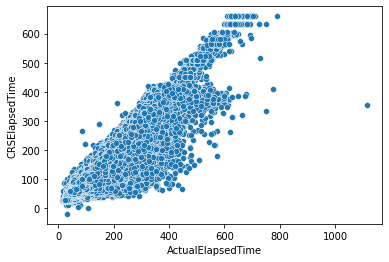

In [165]:
# visualitzem la relacio entre aquestes dues variables relacionades
sns.scatterplot(x='ActualElapsedTime',y = 'CRSElapsedTime',data=X)

+ Despres ja farem un FEATURE ENGINEERING per corregir aixo

<AxesSubplot:xlabel='ActualElapsedTime', ylabel='Distance'>

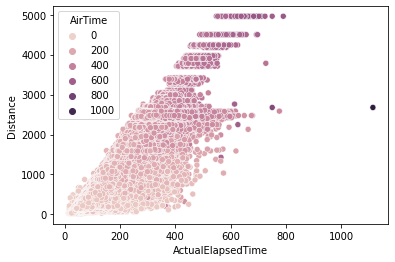

In [168]:
sns.scatterplot(x='ActualElapsedTime', y='Distance',hue='AirTime',data=X)

+ Speed  = Distance/time 

+ Despres ja farem FEATURE ENGINEERING

In [170]:
X.describe().round(2)

,Month,DayofMonth,DayOfWeek,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
count,1247484.00,1247484.00,1247484.00,1247484.00,1247484.00,1247484.00,1247484.00,1247484.00,1247484.00,1247484.00
mean,6.07,15.73,3.98,135.38,131.76,107.42,59.68,741.59,7.30,20.66
std,3.51,8.79,1.99,72.30,69.53,68.17,59.87,559.36,6.03,16.68
min,1.00,1.00,1.00,14.00,-21.00,0.00,6.00,11.00,0.00,0.00
25%,3.00,8.00,2.00,83.00,80.00,58.00,24.00,334.00,4.00,11.00
50%,6.00,16.00,4.00,118.00,115.00,90.00,41.00,595.00,6.00,16.00
75%,9.00,23.00,6.00,167.00,161.00,136.00,75.00,972.00,8.00,24.00
max,12.00,31.00,7.00,1114.00,660.00,1091.00,2467.00,4962.00,240.00,422.00


+ veiem que DepDelay o distance tenen desviacions grans

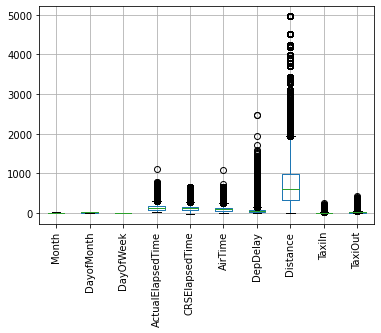

In [173]:
# anem a mirar si hi han molts outliers dins de cada columna
box = X.boxplot(rot=90)

In [175]:
df[df['Distance']>4960]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
114923,2008,1,11,5,13:44,13:20,19:47,19:20,CO,15,N78060,663.0,660.0,629.0,27.0,24.0,EWR,HNL,4962,6.0,28.0
115545,2008,1,20,7,13:32,13:20,19:39,19:20,CO,15,N67052,667.0,660.0,626.0,19.0,12.0,EWR,HNL,4962,10.0,31.0
115555,2008,1,22,2,14:41,13:20,20:16,19:20,CO,15,N78060,635.0,660.0,607.0,56.0,81.0,EWR,HNL,4962,6.0,22.0
115762,2008,1,23,3,14:40,13:20,19:54,19:20,CO,15,N68061,614.0,660.0,589.0,34.0,80.0,EWR,HNL,4962,8.0,17.0
115862,2008,1,4,5,13:39,13:20,19:40,19:20,CO,15,N66057,661.0,660.0,636.0,20.0,19.0,EWR,HNL,4962,8.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242818,2008,12,11,4,15:03,13:35,20:28,19:35,CO,15,N59053,625.0,660.0,599.0,53.0,88.0,EWR,HNL,4962,6.0,20.0
1243641,2008,12,8,1,01:04,20:55,16:19,11:20,CO,14,N68061,615.0,565.0,583.0,299.0,249.0,HNL,EWR,4962,13.0,19.0
1243698,2008,12,7,7,14:35,13:35,20:12,19:35,CO,15,N68061,637.0,660.0,610.0,37.0,60.0,EWR,HNL,4962,6.0,21.0
1243967,2008,12,3,3,14:41,13:35,20:05,19:35,CO,15,N67052,624.0,660.0,599.0,30.0,66.0,EWR,HNL,4962,7.0,18.0


+ tot i que hi han outliers no els trec perque per exemple un vol amb una distancia molt llarga (considerat outlier) no significa que sigui una anomalia. Aquests vols van de EWR ->NEWPORT (NEW YORK) a HNL->HONOLULU (HAWAI) o viceversa

+ de la mateixa manera cada columna te els seus outliers pero s'hauria de mirar un a un si es treuen o no

In [179]:
#save this clean data for future references
df.to_csv('flights_clean_v2.csv', index = False)

#### faig servir totes les dades per aquest primer exercici

In [180]:
# model de regressio 1: lineal
from sklearn.linear_model import LinearRegression
# metode lineal basat en Ordinary Least Squares (OLS)
linear_model = LinearRegression()

In [ ]:
# model de regressio 2: Lasso Regressor
# model lineal pero que penalitza incloure moltes variables o variables amb coficients grans
# LASSO regression is a variation of linear regression specifically adapted for data that shows
# heavy multicollinearity (heavy correlation of features with each other). 
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X,y)
print(lasso_model.coef_)
plt.bar(X.columns,lasso_model.coef_)
plt.xticks(rotation=90)
plt.ylabel('Importancia de los coef')
plt.show()

+ Month, DayofMonth DayofWeek or Distance no semblen tener importancia per predir ArrDelay
+ les dades mostrenmulticollinearity

In [182]:
# check if the target is within the features to avoid modeling
'ArrDelay' in X.columns

False

In [183]:
# model de regressio 3: Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor()

# Exercici 2

Compara’ls en base al MSE i al R2 .

In [184]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

In [185]:
modelos = [linear_model,lasso_model,decision_tree_model]
for model in modelos:
    model.fit(X,y)
    y_pred = model.predict(X)    
    R2 = r2_score(y,y_pred) 
    mse = MSE(y,y_pred)
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')    

modelo: LinearRegression() R2 score: 0.9999999978282297, MSE: 8.016060654619086e-06
modelo: Lasso(alpha=0.1) R2 score: 0.99999913553871, MSE: 0.003190749112018779
modelo: DecisionTreeRegressor() R2 score: 1.0, MSE: 0.0


### com es possible que surti R2 score proper a 1? overfitting per no separar train/test sets?

# Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

In [18]:
# find the best alpha parameter
from sklearn.linear_model import LassoCV
alpha = np.logspace(-8, 2, 10)
print(alpha)
lasso_model = LassoCV(alphas=alpha)
lasso_model.fit(X, y)
print(f'the best alpha is {lasso_model.alpha_}')


[1.00000000e-08 1.29154967e-07 1.66810054e-06 2.15443469e-05
 2.78255940e-04 3.59381366e-03 4.64158883e-02 5.99484250e-01
 7.74263683e+00 1.00000000e+02]
the best alpha is 1e-08


In [33]:
linear = LinearRegression()
lasso = Lasso(alpha=1E-8) # if normalize =True all variable are in the same scale
tree = DecisionTreeRegressor(criterion='mse',max_depth= 20,min_samples_leaf=5)
# for tree, the higher the max_depth can lead to OVERFITTING...

In [34]:
modelos = [linear,lasso,tree]
for model in modelos:
    model.fit(X,y)
    y_pred = model.predict(X)    
    R2 = r2_score(y,y_pred) 
    mse = MSE(y,y_pred)
    
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')
    

modelo: LinearRegression() R2 score: 1.0, MSE: 1.4623997209850364e-26
modelo: Lasso(alpha=1e-08) R2 score: 0.9999997804981632, MSE: 0.0008101869906442889
modelo: DecisionTreeRegressor(max_depth=20, min_samples_leaf=5) R2 score: 0.9983600089728152, MSE: 6.053249549243231


# Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)



In [21]:
from sklearn.model_selection import train_test_split,cross_val_score

In [22]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3)

In [23]:
modelos = [linear,lasso,tree]
for model in modelos:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)    
    R2 = r2_score(y_test,y_pred) 
    mse = MSE(y_test,y_pred)
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')
    

modelo: LinearRegression() R2 score: 1.0, MSE: 2.3017872121473022e-26
modelo: Lasso(alpha=1e-08, normalize=True) R2 score: 0.9999998136976886, MSE: 0.0006942642633816453
modelo: DecisionTreeRegressor(max_depth=20) R2 score: 0.9960517049525054, MSE: 14.713505879104046


In [24]:
# calculo R2 score usando cross validation para ser menos sensible a como dividimos los datos entre train i test 
modelos = [linear,lasso,tree]
for model in modelos:
    cv_results = cross_val_score(model, X, y, cv=5)   
    print(f'modelo: {str(model)} R2 score: {np.mean(cv_results)}')

modelo: LinearRegression() R2 score: 0.9999999990719701
modelo: Lasso(alpha=1e-08, normalize=True) R2 score: 0.9999997998440012
modelo: DecisionTreeRegressor(max_depth=20) R2 score: 0.9960157721747904


### Nivell 2



# Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció



+ Com puc millorar la prediccio? segurament estic fent algun error

In [56]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,18:29,17:55,19:59,19:25,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
1,2008,1,3,4,19:37,18:30,20:37,19:40,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0
2,2008,1,3,4,16:44,15:10,18:45,17:25,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,8.0,0.0,0.0,0.0,72.0
3,2008,1,3,4,14:52,14:25,16:40,16:25,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,3.0,0.0,0.0,0.0,12.0
4,2008,1,3,4,13:23,12:55,15:26,15:10,WN,4,N674AA,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0.0,0.0,0.0,0.0,16.0


In [70]:
columns_2_study=['ActualElapsedTime','CRSElapsedTime','AirTime','DepDelay','Origin','Dest','Distance','TaxiIn','TaxiOut','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']

In [72]:
X_new = df[columns_2_study]

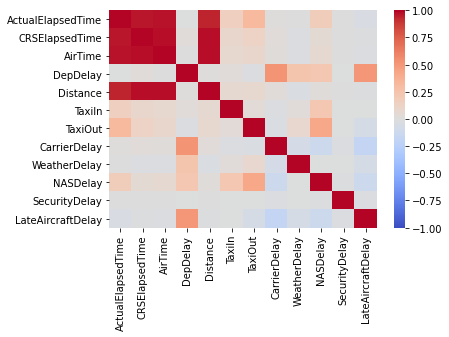

In [73]:
corr = X_new.corr()
sns.heatmap(corr,cmap='coolwarm',vmax=1, vmin=-1)
plt.show()

In [60]:
# crear noves columnes (FEATURE ENGINEERING)
df['Speed(miles/h)']=df['Distance']/(df['ActualElapsedTime']/60)
df['ElapseTime_difference']=df['ActualElapsedTime']-df['CRSElapsedTime']

In [61]:
df[df['Speed(miles/h)']>800]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Speed(miles/h),ElapseTime_difference
68293,2008,1,25,5,04:08,12:40,05:58,15:42,EV,4598,N717EV,50.0,122.0,30.0,856.0,928.0,MKE,ATL,669,3.0,17.0,856.0,0.0,0.0,0.0,0.0,802.8,-72.0
221611,2008,2,3,7,11:00,08:50,11:30,10:30,9E,5794,85419E,30.0,100.0,2.0,60.0,130.0,MEM,DSM,490,5.0,23.0,60.0,0.0,0.0,0.0,0.0,980.0,-70.0
736986,2008,7,18,5,23:45,21:10,00:05,22:36,OH,5685,N957CA,20.0,86.0,6.0,89.0,155.0,DCA,LEX,414,4.0,10.0,0.0,89.0,0.0,0.0,0.0,1242.0,-66.0


In [62]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Speed(miles/h),ElapseTime_difference
0,2008,1,3,4,18:29,17:55,19:59,19:25,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0,343.333333,0.0
1,2008,1,3,4,19:37,18:30,20:37,19:40,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0,397.750000,-10.0
2,2008,1,3,4,16:44,15:10,18:45,17:25,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,8.0,0.0,0.0,0.0,72.0,410.578512,-14.0
3,2008,1,3,4,14:52,14:25,16:40,16:25,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,3.0,0.0,0.0,0.0,12.0,391.842105,-12.0
4,2008,1,3,4,13:23,12:55,15:26,15:10,WN,4,N674AA,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0.0,0.0,0.0,0.0,16.0,408.780488,-12.0


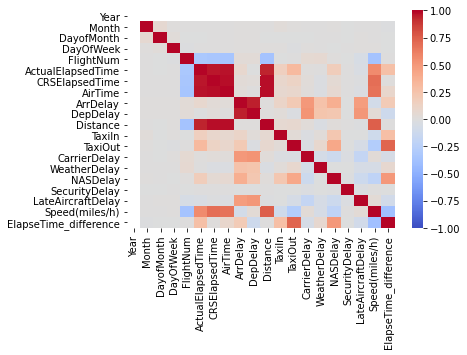

In [63]:
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm',vmax=1, vmin=-1)
plt.show()

<AxesSubplot:xlabel='Speed(miles/h)', ylabel='ElapseTime_difference'>

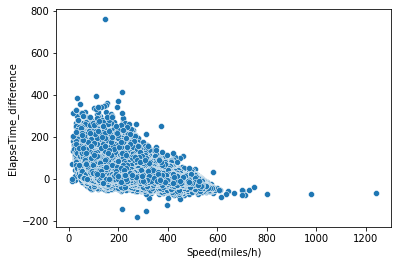

In [65]:
sns.scatterplot(x='Speed(miles/h)',y='ElapseTime_difference',data=df)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df_subset),columns=df_subset.columns)

NameError: name 'df_subset' is not defined

In [ ]:
df_scaler.head()

In [ ]:
sns.histplot(df_subset['ArrDelay'],color='black',alpha=0.5,bins=100)

In [ ]:
sns.histplot(df_scaler['ArrDelay'],color='red')
plt.xlim([-2,5])

In [ ]:
X_new,y_new = get_X_y_from_dataset(dataframe=df_scaler,target_colum='ArrDelay')

X_train_new,X_test_new,y_train_new, y_test_new = train_test_split(X_new,y_new,test_size=0.3)

In [ ]:
df_scaler.head()

In [ ]:
modelos = [linear,lasso,tree]
for model in modelos:
    model.fit(X_train_new,y_train_new)
    y_pred = model.predict(X_test_new)    
    R2 = r2_score(y_test_new,y_pred) 
    mse = MSE(y_test_new,y_pred)
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')

+ R2 score se mantien igual pero MSE baja

### Nivell 3


# Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions

In [ ]:
df_final = df_scaler.drop('DepDelay',axis=1)
X,y = get_X_y_from_dataset(dataframe=df_final,target_colum='ArrDelay')

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3)
modelos = [linear,lasso,tree]
for model in modelos:
    model.fit(X_train_new,y_train_new)
    y_pred = model.predict(X_test_new)    
    R2 = r2_score(y_test_new,y_pred) 
    mse = MSE(y_test_new,y_pred)
    print(f'modelo: {str(model)} R2 score: {R2}, MSE: {mse}')

+ el resultat final no varia massa per tant DepDelay no es una de les variables que serveixen a l'hora de contruir aquesta regressio per predir el ArrDelay

### como es possible que DepDelay no importe si tiene una fuerte correlation con ArrDelay ?

